# Régression logistique en 2D

Prédire la couleur d'un vin à partir de ses composants.

In [1]:
%matplotlib inline

In [2]:
from papierstat.datasets import load_wines_dataset
data = load_wines_dataset()
X = data.drop(['quality', 'color'], axis=1)
y = data['color']

In [3]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [4]:
from statsmodels.discrete.discrete_model import Logit
model = Logit(y_train == "white", X_train)
res = model.fit()

Optimization terminated successfully.
         Current function value: 0.044575
         Iterations 11


In [5]:
res.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                             Results: Logit
========================================================================
Model:                 Logit               No. Iterations:      11.0000 
Dependent Variable:    color               Pseudo R-squared:    0.921   
Date:                  2018-02-08 00:13    AIC:                 456.3398
No. Observations:      4872                BIC:                 527.7436
Df Model:              10                  Log-Likelihood:      -217.17 
Df Residuals:          4861                LL-Null:             -2748.5 
Converged:             1.0000              Scale:               1.0000  
------------------------------------------------------------------------
                      Coef.   Std.Err.    z     P>|z|   [0.025   0.975] 
------------------------------------------------------------------------
fixed_acidity         -1.4449   0.1519  -9.5141 0.0000  -1.7425  -1.1472
volatile_acidity     -12.0133   0.9940 -12.0857 0.0000 -13.9615 -10.0651
citric_acid            0.1218   1.1387   0.1070 0.9148  -2.1101   2.3537
residual_sugar         0.0780   0.0578   1.3484 0.1775  -0.0354   0.1913
chlorides            -33.6942   4.1533  -8.1125 0.0000 -41.8346 -25.5538
free_sulfur_dioxide   -0.0474   0.0149  -3.1804 0.0015  -0.0767  -0.0182
total_sulfur_dioxide   0.0691   0.0055  12.6272 0.0000   0.0584   0.0798
density               45.6528   4.4627  10.2299 0.0000  36.9061  54.3994
pH                   -10.0587   1.0255  -9.8086 0.0000 -12.0687  -8.0488
sulphates             -9.1971   1.0697  -8.5980 0.0000 -11.2936  -7.1006
alcohol                0.5328   0.1284   4.1494 0.0000   0.2811   0.7844
========================================================================

"""

On ne garde que les deux premières.

In [6]:
X_train2 = X_train.iloc[:, :2]

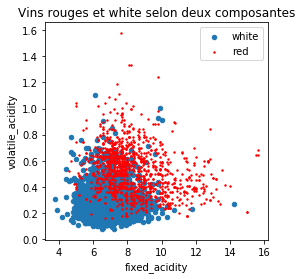

In [7]:
import pandas
df = pandas.DataFrame(X_train2.copy())
df['y'] = y_train

import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 1, figsize=(4, 4))
df[df.y == "white"].plot(x="fixed_acidity", y="volatile_acidity", ax=ax, kind='scatter', label="white")
df[df.y == "red"].plot(x="fixed_acidity", y="volatile_acidity", ax=ax,
                       kind='scatter', label="red", color="red", s=2)
ax.set_title("Vins rouges et white selon deux composantes");

In [8]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train2, y_train == "white")

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [9]:
model.coef_, model.intercept_

(array([[ -0.92015604, -10.76494765]]), array([11.96976599]))

On trace cette droite sur le graphique.

In [10]:
x0 = 3
y0 = -(model.coef_[0,0] * x0 + model.intercept_) / model.coef_[0,1]
x1 = 14
y1 = -(model.coef_[0,0] * x1 + model.intercept_) / model.coef_[0,1]
x0, y0, x1, y1

(3, array([0.85548933]), 14, array([-0.08475829]))

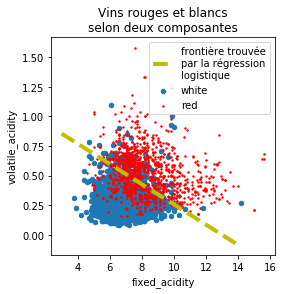

In [11]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 1, figsize=(4, 4))
df[df.y == "white"].plot(x="fixed_acidity", y="volatile_acidity", ax=ax, kind='scatter', label="white")
df[df.y == "red"].plot(x="fixed_acidity", y="volatile_acidity", ax=ax,
                       kind='scatter', label="red", color="red", s=2)
ax.plot([x0, x1], [y0, y1], 'y--', lw=4, label='frontière trouvée\npar la régression\nlogistique')
ax.legend()
ax.set_title("Vins rouges et blancs\nselon deux composantes");